# Project 2020 - Fundamentals of Data Analysis
Due: last commit on or before January 8th, 2021

Instructions

In this project you must perform and explain simple linear regression using Python
on the powerproduction dataset available on Moodle. The goal is to accurately predict wind turbine power output from wind speed values using the data set as a basis.

Your submission must be in the form of a git repository containing, at a minimum, the
following items:

1. Jupyter notebook that performs simple linear regression on the data set.
2. In that notebook, an explanation of your regression and an analysis of its accuracy.
3. Standard items in a git repository such as a README.

To enhance your submission, you might consider comparing simple linear regression to
other types of regression on this data set. Rest assured, all the above concepts will be
explored in lecture videos and other materials in the coming semester.

# Simple Linear Regression

>Simple linear regression is used to estimate the relationship between two quantitative variables. 
https://www.scribbr.com/statistics/simple-linear-regression/

>Some other examples of statistical relationships might include:<br>
Height and weight — as height increases, you'd expect weight to increase, but not perfectly.<br>
Alcohol consumed and blood alcohol content — as alcohol consumption increases, you'd expect one's blood alcohol content to increase, but not perfectly.<br>
Vital lung capacity and pack-years of smoking — as amount of smoking increases (as quantified by the number of pack-years of smoking), you'd expect lung function (as quantified by vital lung capacity) to decrease, but not perfectly.<br>
Driving speed and gas mileage — as driving speed increases, you'd expect gas mileage to decrease, but not perfectly.<br>
Okay, so let's study statistical relationships between one response variable y and one predictor variable x!
https://online.stat.psu.edu/stat462/node/91/

In our case we will be using Simple linear regression to show the relationship between **Wind Speed** and **power** produced by a wind turbine.

The graph from the code below, provides a very effective illustration of power generated from wind.

As wind speed increases, power produced increases, until wind speeds exceed 24 mph and the turbine owner has to turn off the turbine. If there is zero wind speed or very low wind speeds, the graph shows us that there is not sufficient speed to generate power.

Similar of Simple Linear Regression of height / weight, as one variable increases, there is often a relationship where the other variable size increases. There is the normal Simple Linear Regression of infant,child,teenager,adult gaining in height and weight, then there will be dotted exceptions outside of the linear line for gigantism and obesity. However just like height and weight analogy, people generally don't exceed 7ft in height, the linear graph will plateau at 7ft + in height.

On our graph below we have dotted exceptions for windy days with no power, and there can be disparities for power surges where an exceptionally high amount of power was produced compared to days with similar wind.

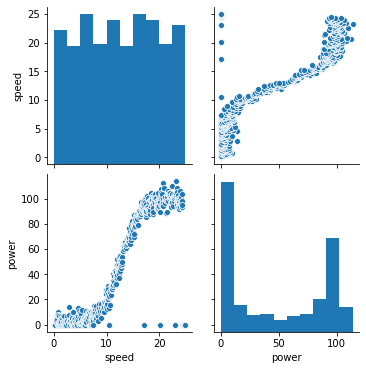

In [1]:
import seaborn as sns
import pandas as pd

powerproduction = pd.read_csv('powerproduction.csv')
sns.pairplot(powerproduction)



In [1]:
import pandas as pd
df = pd.read_csv("powerproduction.csv")
print(df.head(5))

   speed  power
0  0.000    0.0
1  0.125    0.0
2  0.150    0.0
3  0.225    0.0
4  0.275    0.0


# A LOOK AT THE RAW DATASET

The goal is to accurately predict wind turbine power output from wind speed values using the data set as a basis.

What does a cursory glance of the data set show us?
From a cursory observation of the CSV data, wind speeds equal to 0.275 or below and equal to 24.499 or above generated no energy generated, there were also some other days when winds between these speeds generated zero power. 

What does the energy industry tell us about when wind turbines generate zero power?

1. It’s not windy enough for them to operate at all
2. The turbines need maintenance,
3. The turbines are being fixed
4. There is no demand on the grid for the supply of the energy.
5. It’s too windy for them to operate 


## Summary Of The Data
Wind speeds equal to 0.275 or below generate zero power.
Every speed between 0.325 (the lowest recorded value for generating power) and 24.399 (the highest power recorded for generating power), should generate power.
Anomalies when wind speed technically could generate power but doesn't (these can be explained by points 2,3 and 4 above)
Wind speeds equal to 24.499 or above generate zero power.

## Deal with the anomalies

The question is 'to accurately predict wind turbine power output from wind speed values using the data set as a basis'
Can power output from wind speed be accurately predicted if the anomalies are left in the data? I don't believe so.

Imagine the client coming to you on a windy day of 5mph, asking what the likely energy output is for the windspeed of today, and you telling him the wind energy output today will be zero because you are turning the wind turbine off because the grid doesn't need power. Your client's question is 'what the likely energy output is for the windspeed of today', your client wants to know how much energy a 5mph wind can produce. This is the question that we are answering.

We are taking the hypothesis




In [7]:
import pandas as pd

# https://dev.to/chanduthedev/how-to-display-all-rows-from-data-frame-using-pandas-dha

pd.set_option('display.max_rows', df.shape[0]+1)
df = pd.read_csv("powerproduction.csv")
print(df)

      speed    power
0     0.000    0.000
1     0.125    0.000
2     0.150    0.000
3     0.225    0.000
4     0.275    0.000
5     0.325    4.331
6     0.400    5.186
7     0.450    3.826
8     0.501    1.048
9     0.526    5.553
10    0.551    6.498
11    0.576    5.241
12    0.626    4.220
13    0.676    7.974
14    0.701    9.746
15    0.726    0.000
16    0.751    0.000
17    0.801    7.271
18    0.826    0.795
19    0.851    7.350
20    0.926    1.996
21    0.951    1.609
22    0.976    2.064
23    1.001    6.511
24    1.026    0.000
25    1.051    2.085
26    1.076    0.000
27    1.101    0.121
28    1.151    1.208
29    1.251    3.373
30    1.276    6.510
31    1.301    0.000
32    1.401    4.156
33    1.426    2.005
34    1.502    5.352
35    1.552    0.000
36    1.652    7.221
37    1.677    0.000
38    1.702    2.439
39    1.827    0.000
40    1.877    2.359
41    1.902    7.048
42    2.027    0.000
43    2.077    0.000
44    2.102    0.000
45    2.177    2.701
46    2.227  

In [2]:
import pandas as pd
df = pd.read_csv("powerproduction.csv")
is_power_zero =  df['power']==0.0
print(is_power_zero)

0      True
1      True
2      True
3      True
4      True
       ... 
495    True
496    True
497    True
498    True
499    True
Name: power, Length: 500, dtype: bool


In [3]:
show_zeros = df[is_power_zero]
print(show_zeros.shape)

(49, 2)


In [4]:
print(show_zeros)

      speed  power
0     0.000    0.0
1     0.125    0.0
2     0.150    0.0
3     0.225    0.0
4     0.275    0.0
15    0.726    0.0
16    0.751    0.0
24    1.026    0.0
26    1.076    0.0
31    1.301    0.0
35    1.552    0.0
37    1.677    0.0
39    1.827    0.0
42    2.027    0.0
43    2.077    0.0
44    2.102    0.0
47    2.252    0.0
60    3.128    0.0
65    3.504    0.0
67    3.579    0.0
70    3.679    0.0
73    3.779    0.0
74    3.804    0.0
75    3.879    0.0
83    4.429    0.0
89    4.880    0.0
105   5.556    0.0
110   5.781    0.0
111   5.806    0.0
114   5.931    0.0
133   6.782    0.0
135   6.857    0.0
136   6.957    0.0
140   7.107    0.0
149   7.432    0.0
208  10.511    0.0
340  17.167    0.0
404  20.095    0.0
456  22.998    0.0
490  24.499    0.0
491  24.525    0.0
492  24.575    0.0
493  24.650    0.0
494  24.750    0.0
495  24.775    0.0
496  24.850    0.0
497  24.875    0.0
498  24.950    0.0
499  25.000    0.0
